<a href="https://githubtocolab.com/Astolfo2332/HyM_prediction/blob/main/0.1_Analisis_De_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Análisis de datos predicción de compra H&M

In [ ]:
from google.colab import files

files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
'chmod 600 /root/.kaggle/kaggle.json' #Para proteger la información

In [ ]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f articles.csv
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f customers.csv
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f transactions_train.csv
! mkdir Data
! unzip transactions_train.csv.zip -d Data
! unzip customers.csv.zip -d Data
! unzip articles.csv.zip -d Data

## 1.0 Análisis inicial de las variables de interés   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing as ps
from difflib import SequenceMatcher

Primero procedemos a leer los datos

In [2]:
df=pd.read_csv("Data/articles.csv")
df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [51]:
df2=pd.read_csv("Data/customers.csv")
df2.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
df3=pd.read_csv("Data/transactions_train.csv")
df3.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


En este caso como nos interesa saber el orden y la posibilidad de compras de los clientes no centraremos en las transacciones, para así tener una idea de cuales son los items o los compradores más frecuentes del data set

Podemos observar que la mayor compra de artículos es de un valor de 3

Text(0.5, 1.0, 'Histogramas de el historial de compras')

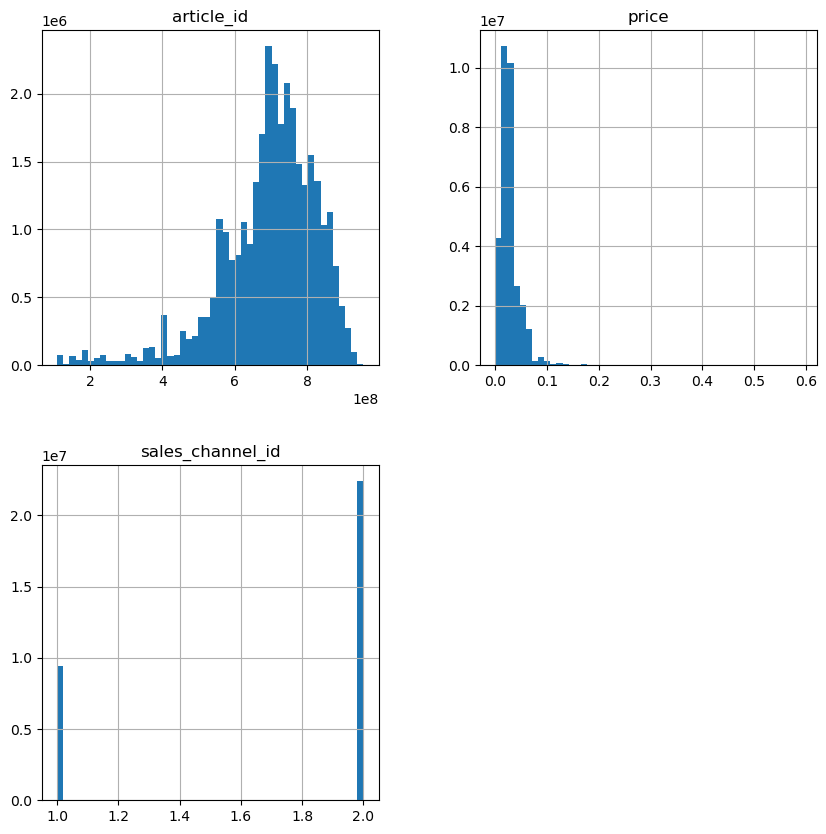

In [5]:
df3.hist(bins=50,figsize=(10,10))
plt.title("Histogramas de el historial de compras")


In [6]:
print('Skewness de la variable ', df3["article_id"].skew())

Skewness de la variable  -1.2593407027143166


La curva esta corrida a la derecha pero en este caso no importa mucho

In [7]:
df3.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


Para la idea de los mayores valores de interés ahora conocemos de cada columna la moda 

In [8]:
df3.mode()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-09-28,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,706016001,0.016932,2


A continuación se buscaran los mayores valores en cada tabla con una representación de artículos más vendidos, mejores compradores etc, para ello primero implementaremos una función: 

In [21]:
def top10(data,name,title):
    top10a=data[name].value_counts()[:10]
    plt.figure(figsize=(10,10))
    sns.countplot(y=name,data=data,order=top10a.index)
    plt.ylabel(title)
    return top10a

Artículos más vendidos

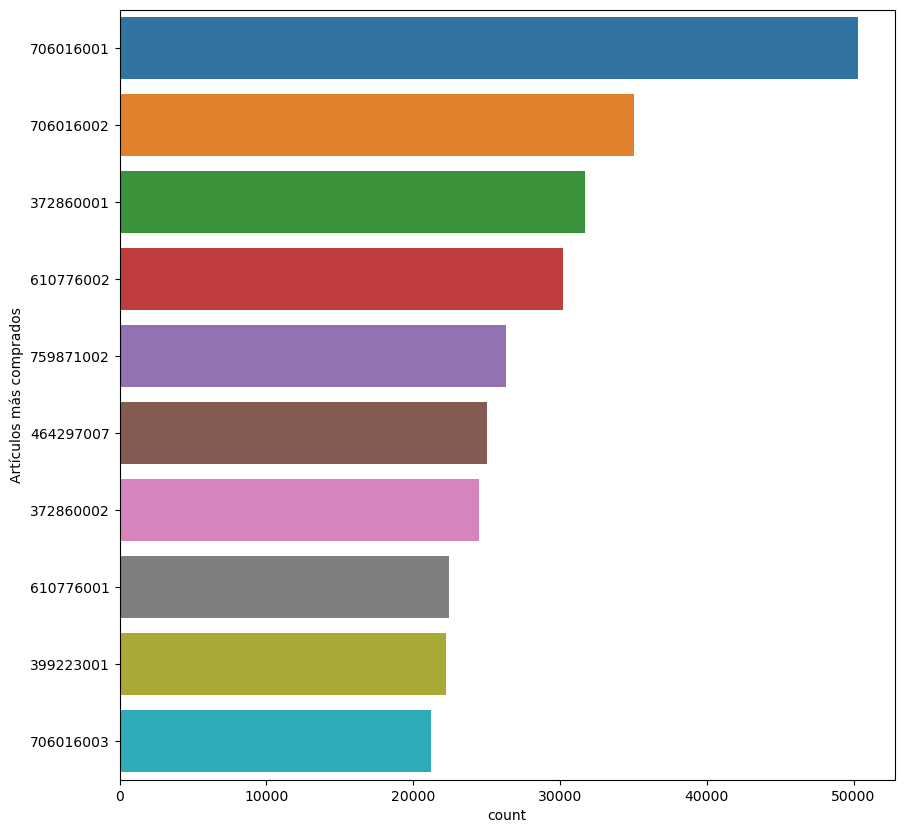

In [48]:
a=top10(df3,"article_id","Artículos más comprados")


En este caso podemos ver una descripción más en detalle de los artículos 

In [46]:
df[df.article_id.isin(a.index.tolist())]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1713,372860001,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,9,Black,...,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
1714,372860002,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,10,White,...,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
2236,399223001,399223,Curvy Jeggings HW Ankle,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Denim Trousers,D,Divided,2,Divided,57,Ladies Denim,1016,Trousers Denim,"Jeggings in washed, superstretch denim with a ..."
3711,464297007,464297,Greta Thong Mynta Low 3p,286,Underwear bottom,Underwear,1010014,Placement print,9,Black,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Thong briefs in cotton jersey with a wide lace...
24836,610776001,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
24837,610776002,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
53892,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
53893,706016002,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,71,Light Blue,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
53894,706016003,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,73,Dark Blue,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
70221,759871002,759871,Tilda tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,EQ Divided Basics,D,Divided,2,Divided,80,Divided Complements Other,1002,Jersey Basic,"Cropped, fitted top in cotton jersey with narr..."


Los clientes que más compran: 

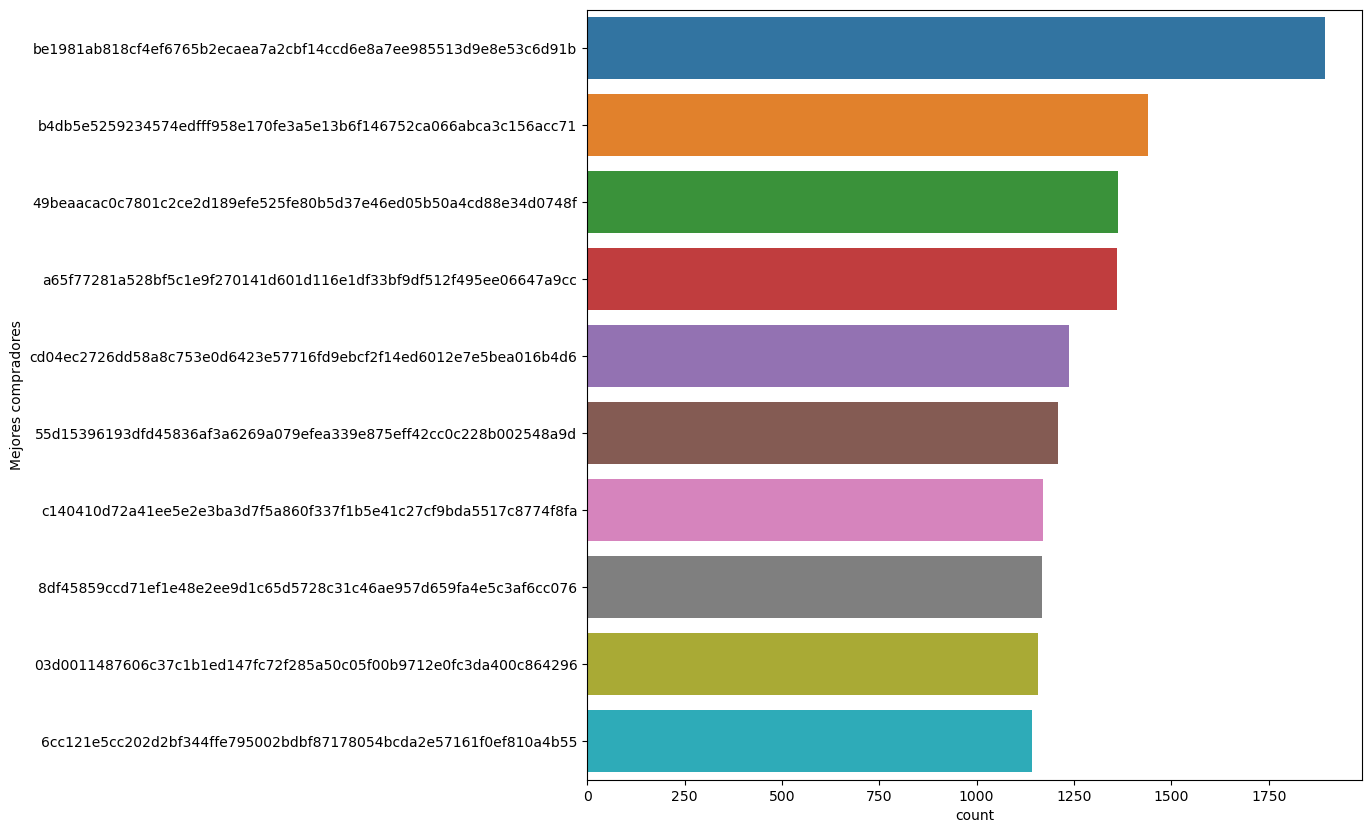

In [49]:
a=top10(df3,"customer_id","Mejores compradores")

En detalle

In [52]:
df2[df2.customer_id.isin(a.index.tolist())]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
20300,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,1.0,1.0,ACTIVE,Regularly,51.0,8db52856d17c197683efbc9d5ef2dc873aaf7062486b2d...
394603,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,NaN,NaN,ACTIVE,NONE,28.0,ab724d6cb2340bd9c5294fd7f2811349f6509a27a8bc5c...
459261,55d15396193dfd45836af3a6269a079efea339e875eff4...,NaN,NaN,ACTIVE,NONE,36.0,ab522f6a3ad49ede7552234ed11f5e7658b8678832010a...
582904,6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...,1.0,1.0,ACTIVE,Regularly,32.0,6480abda4aa42dcf1f5c4597c616bc53365825f1cbdf68...
760470,8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...,1.0,1.0,ACTIVE,Regularly,60.0,9a91a77e198519db58d9dd9c55aa037846701ab4d54a9d...
891429,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1.0,1.0,ACTIVE,Regularly,61.0,c46e53a04e81a44fecaf0ec64ae353bfb3abc91f510e79...
969180,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1.0,1.0,ACTIVE,Regularly,25.0,4acdec769091cb0bc94cfd3324843156dbc572a7281ae4...
1018839,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,NaN,NaN,ACTIVE,NONE,31.0,67851f0456e7070c20c713fe0f47eb15bcbf2a59d13b79...
1035425,c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27c...,NaN,NaN,ACTIVE,NONE,46.0,28f8003feb7f51128f600df30f168d84712718eb94c9d8...
1098652,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1.0,1.0,ACTIVE,Regularly,68.0,771dc009c1a3bab320696643c3396319f1b1dd67ee9de7...


Fechas de mayor ventas:

2019-09-28    198622
2020-04-11    162799
2019-11-29    160875
2018-11-23    142018
2018-09-29    141700
2019-07-24    124683
2019-04-06    119601
2020-06-17    110981
2019-11-28    106257
2019-06-19    104052
Name: t_dat, dtype: int64

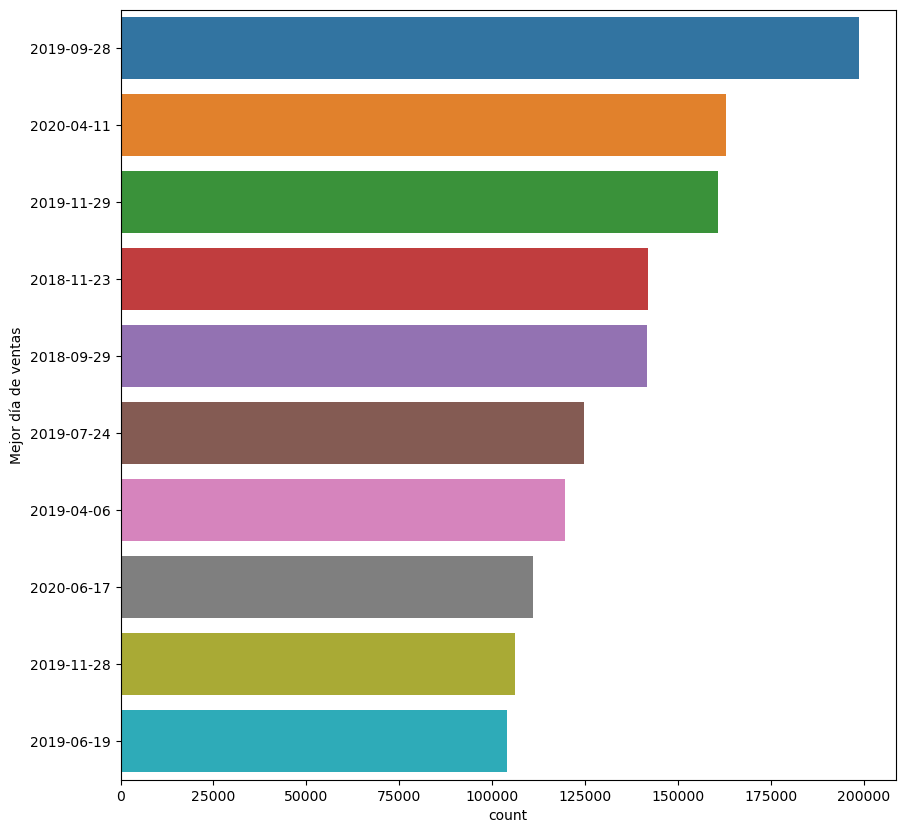

In [22]:
top10(df3,"t_dat","Mejor día de ventas")

## Análisis de artículos

El tipo de producto que más se fabrica

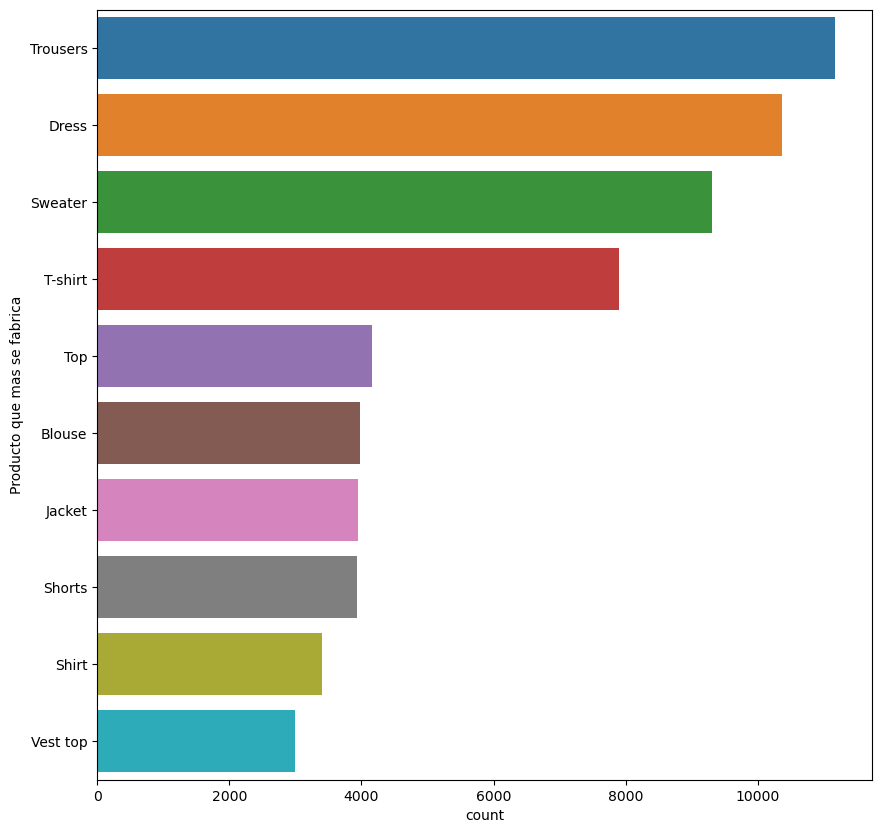

In [54]:
a=top10(df,"product_type_name","Producto que mas se fabrica")

Colores

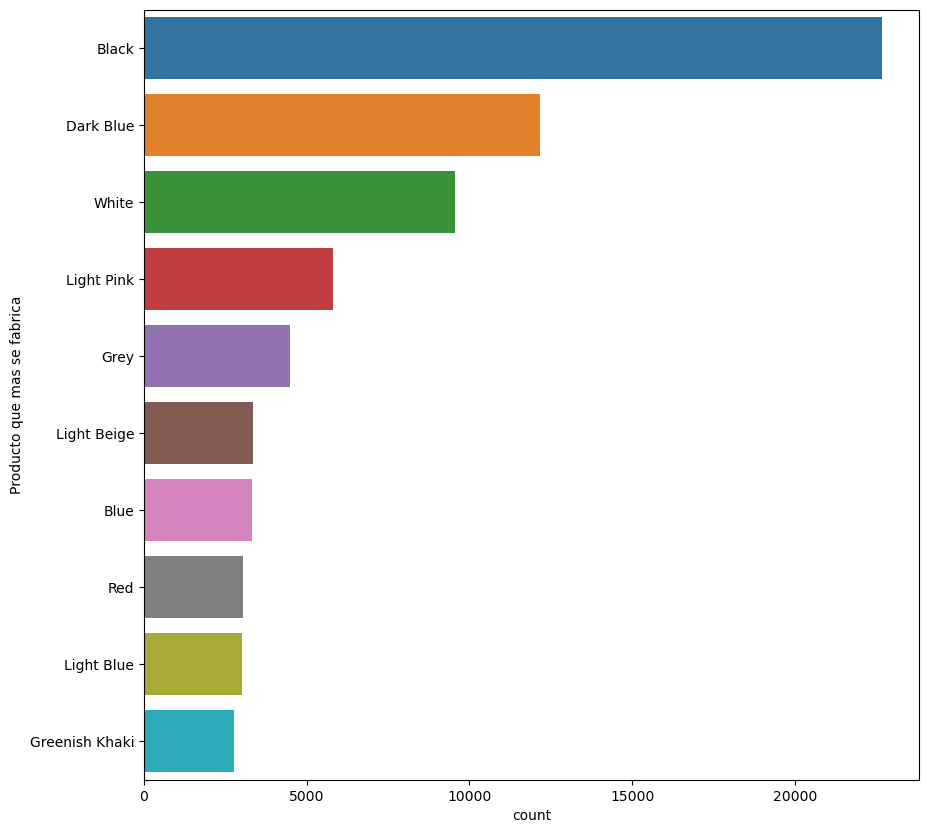

In [55]:
a=top10(df,"colour_group_name","Producto que mas se fabrica")

## Datos faltantes

Vamos a observar si en el dataset existen datos faltantes, de lo contrario los crearemos

Para ventas

In [9]:
total           = df3.isnull().sum().sort_values(ascending=False)
percent         = (df3.isnull().sum()/df3.isnull().count()*100).sort_values(ascending=False)
missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing

,Total,Percent
t_dat,0,0.0
customer_id,0,0.0
article_id,0,0.0
price,0,0.0
sales_channel_id,0,0.0


Para clientes

In [10]:
total           = df2.isnull().sum().sort_values(ascending=False)
percent         = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending=False)
missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing

,Total,Percent
Active,907576,66.150819
FN,895050,65.237831
fashion_news_frequency,16009,1.166854
age,15861,1.156066
club_member_status,6062,0.441843
customer_id,0,0.000000
postal_code,0,0.000000


Para artículos

In [11]:
total           = df.isnull().sum().sort_values(ascending=False)
percent         = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing

,Total,Percent
detail_desc,416,0.394156
perceived_colour_master_name,0,0.000000
garment_group_name,0,0.000000
garment_group_no,0,0.000000
section_name,0,0.000000
section_no,0,0.000000
index_group_name,0,0.000000
index_group_no,0,0.000000
index_name,0,0.000000
index_code,0,0.000000


Así entonces, en el siguiente notebook se hace la eliminación de datos para crear artificialmente datos faltantes